In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dataset_train = os.path.join(os.getcwd(), 'FOTOS')
dataset_test = os.path.join(os.getcwd(), 'TEST')

cats_len_dir = len(os.listdir(os.path.join(dataset_train, 'Cat')))
dogs_len_dir = len(os.listdir(os.path.join(dataset_train, 'Dog')))

print("GATOS: {}" .format(cats_len_dir))
print("CACHORROS: {}" .format(dogs_len_dir))


cats_len_test = len(os.listdir(os.path.join(dataset_test, '1')))
dogs_len_test = len(os.listdir(os.path.join(dataset_test, '2')))

print("GATOS(TESTE): {}".format(cats_len_test))
print("CACHORROS(TESTE): {}".format(dogs_len_test))

GATOS: 999
CACHORROS: 1000
GATOS(TESTE): 499
CACHORROS(TESTE): 500


In [3]:
tam = 160
larg = 160
canais = 3
tam_canais = 255 #fffffffffffffffff
image_size = (larg, tam)
image_shape = image_size + (canais,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

nomes = ['GATO', 'CACHORRO']

In [22]:
dataset_treino = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train,
    image_size=image_size,
    batch_size=batch_size,
    shuffle = True
)

Found 1999 files belonging to 2 classes.


In [21]:
dataset_teste = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

Found 999 files belonging to 2 classes.


In [23]:
dataset_real = tf.data.experimental.cardinality(dataset_teste)
dataset_test_batches = dataset_real // 5

veja = dataset_teste.take(dataset_test_batches)
dataset_teste = dataset_teste.skip(dataset_test_batches)

print("VALIDAÇÃO DATASET: {}".format(tf.data.experimental.cardinality(dataset_teste)))
print("TESTE DATASET: {}".format(tf.data.experimental.cardinality(veja)))

VALIDAÇÃO DATASET: 26
TESTE DATASET: 6


In [1]:
(1000 / 32)*2

62.5

In [24]:
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):
        for i in range(9):
            plt.subplot(3, 3, i+1)
            plt.axis('off')
            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(nomes[labels[i]])

<Figure size 640x480 with 0 Axes>

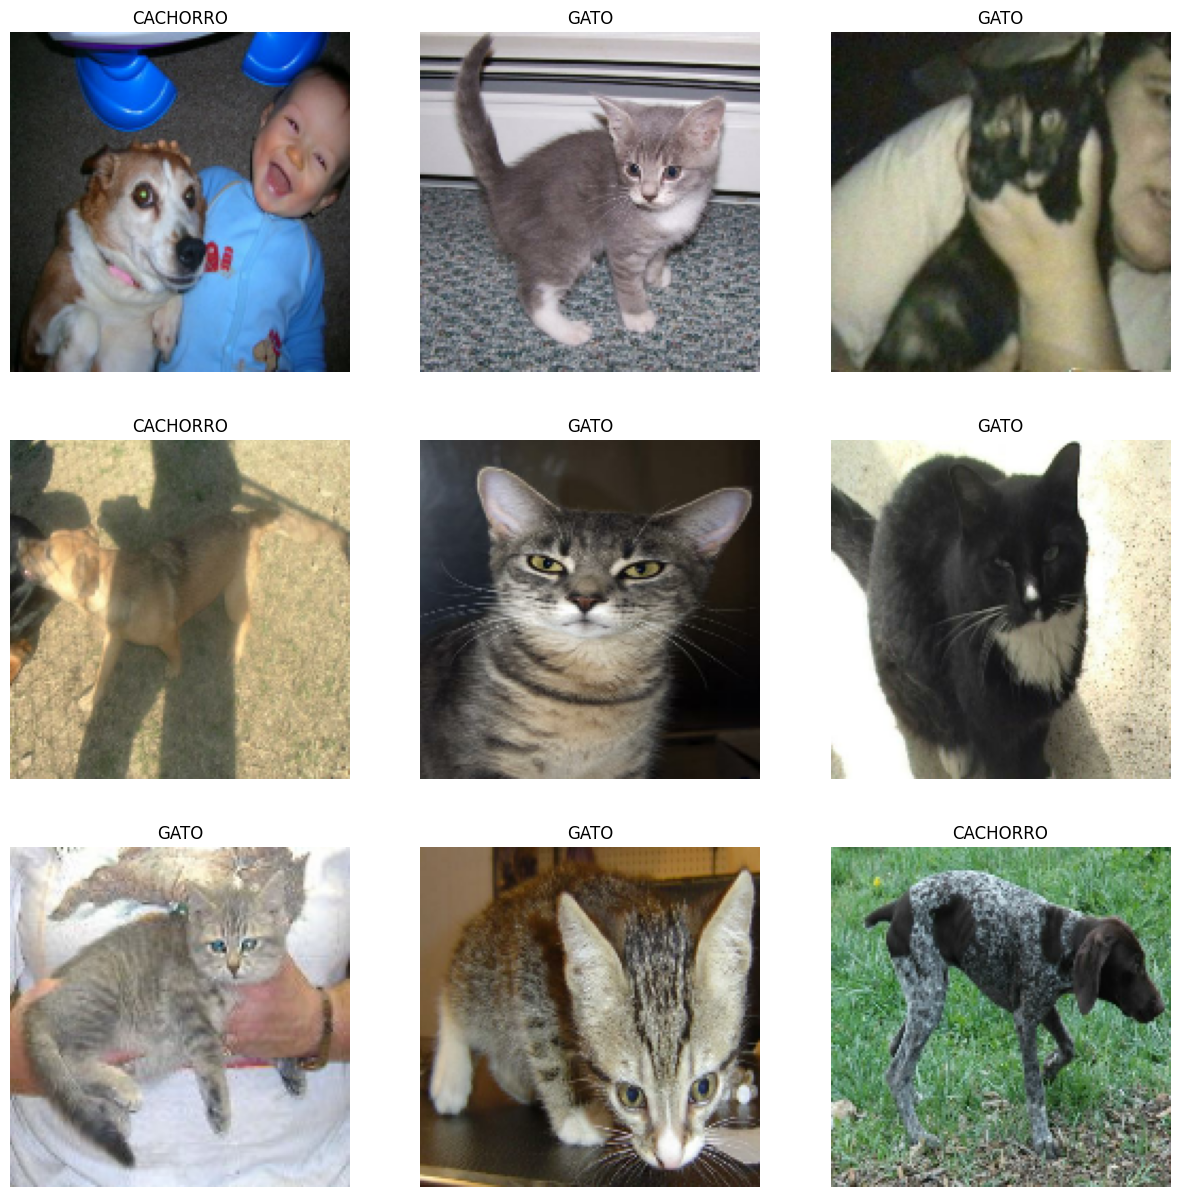

In [25]:
plot_dataset(dataset_treino)

In [26]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [27]:
def plot_dataset_data_augmentation(dataset):
    plt.gcf().clear()
    plt.figure(figsize=(15, 15))

    for features, _ in dataset.take(1):
        feature = features[0]

        for i in range (9):
            feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

            plt.subplot(3, 3, i+1)
            plt.axis('off')

            plt.imshow(feature_data_augmentation[0] / tam_canais)

<Figure size 640x480 with 0 Axes>

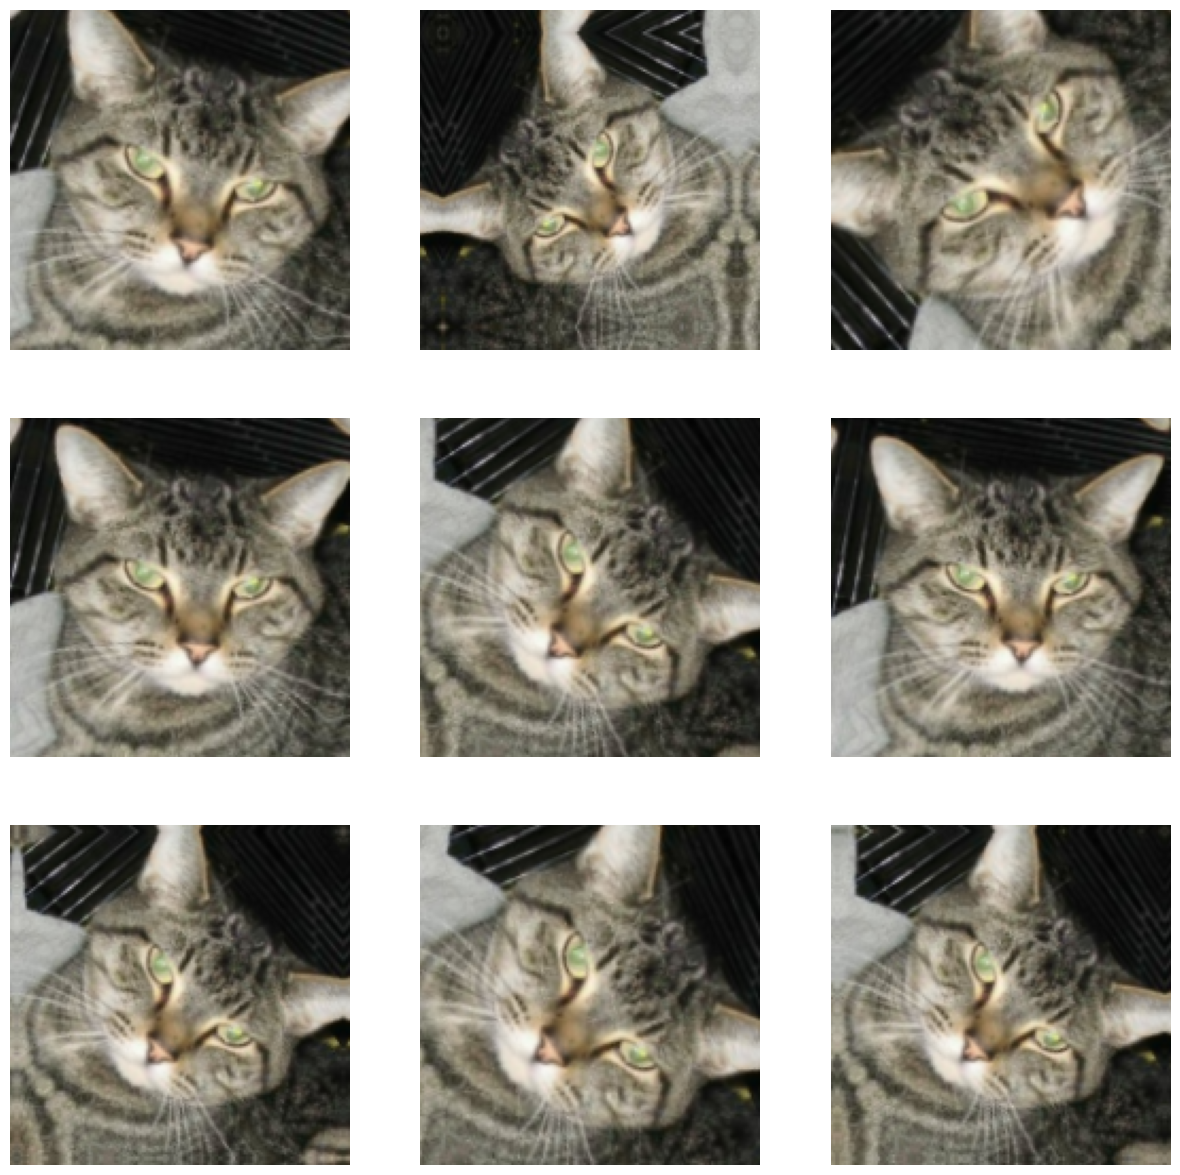

In [28]:
plot_dataset_data_augmentation(dataset_treino)

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1. / tam_canais, input_shape=image_shape),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)
model.summary()

e:\PYTHON\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,200,961 (50.36 MB)

 Trainable params: 13,200,961 (50.36 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
for images, labels in dataset_treino.take(1):
    print("Forma das imagens de treino:", images.shape)
    print("Forma dos rótulos de treino:", labels.shape)
for images, labels in veja.take(1):
    print("Forma das imagens de validação:", images.shape)
    print("Forma dos rótulos de validação:", labels.shape)

Forma das imagens de treino: (32, 160, 160, 3)
Forma dos rótulos de treino: (32,)
Forma das imagens de validação: (32, 160, 160, 3)
Forma dos rótulos de validação: (32,)


In [31]:
history = model.fit(
    dataset_treino,
    validation_data = dataset_teste,
    epochs = epochs
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5054 - loss: 0.7069 - val_accuracy: 0.4994 - val_loss: 0.6791
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6001 - loss: 0.6609 - val_accuracy: 0.6580 - val_loss: 0.6457
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.6919 - loss: 0.5990 - val_accuracy: 0.7063 - val_loss: 0.6005
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7108 - loss: 0.5565 - val_accuracy: 0.6778 - val_loss: 0.6004
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.7460 - loss: 0.5253 - val_accuracy: 0.6952 - val_loss: 0.5910
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.7445 - loss: 0.5194 - val_accuracy: 0.7001 - val_loss: 0.5826
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7690 - loss: 0.4737 - val_accuracy: 0.7286 - val_loss: 0.5856
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.8006 - loss: 0.4387 - val_accuracy: 0.7150 - val_los

In [32]:
def plot_model():
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    plt.title('TRAINING AND VALIDATION ACCURACY')
    plt.plot(epochs_range, accuracy, label = 'TRAINING ACCURACY')
    plt.plot(epochs_range, val_accuracy, label = 'VALIDATION ACCURACY')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('TRAINING AND VALIDATION LOSS')
    plt.plot(epochs_range, loss, label = 'TRAINING LOSS')
    plt.plot(epochs_range, val_loss, label = 'VALIDATION LOSS')
    plt.legend(loc = 'lower right')

    plt.show()


<Figure size 640x480 with 0 Axes>

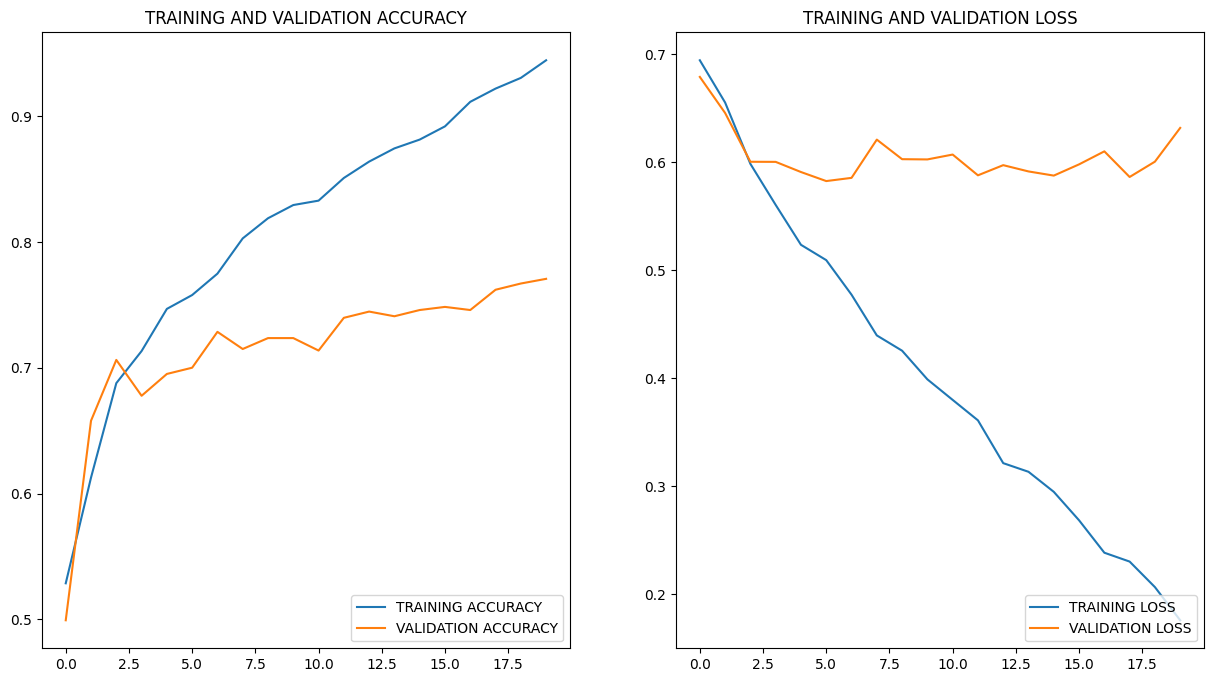

In [33]:
plot_model()

In [34]:
def plot_dataset_predictions(dataset):
    features, labels = dataset.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print("LABELS:      {}".format(labels))
    print("PREDICTIONS: {}".format(predictions.numpy()))

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(nomes[predictions[i]])

LABELS:      [0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1]
PREDICTIONS: [0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1]


<Figure size 640x480 with 0 Axes>

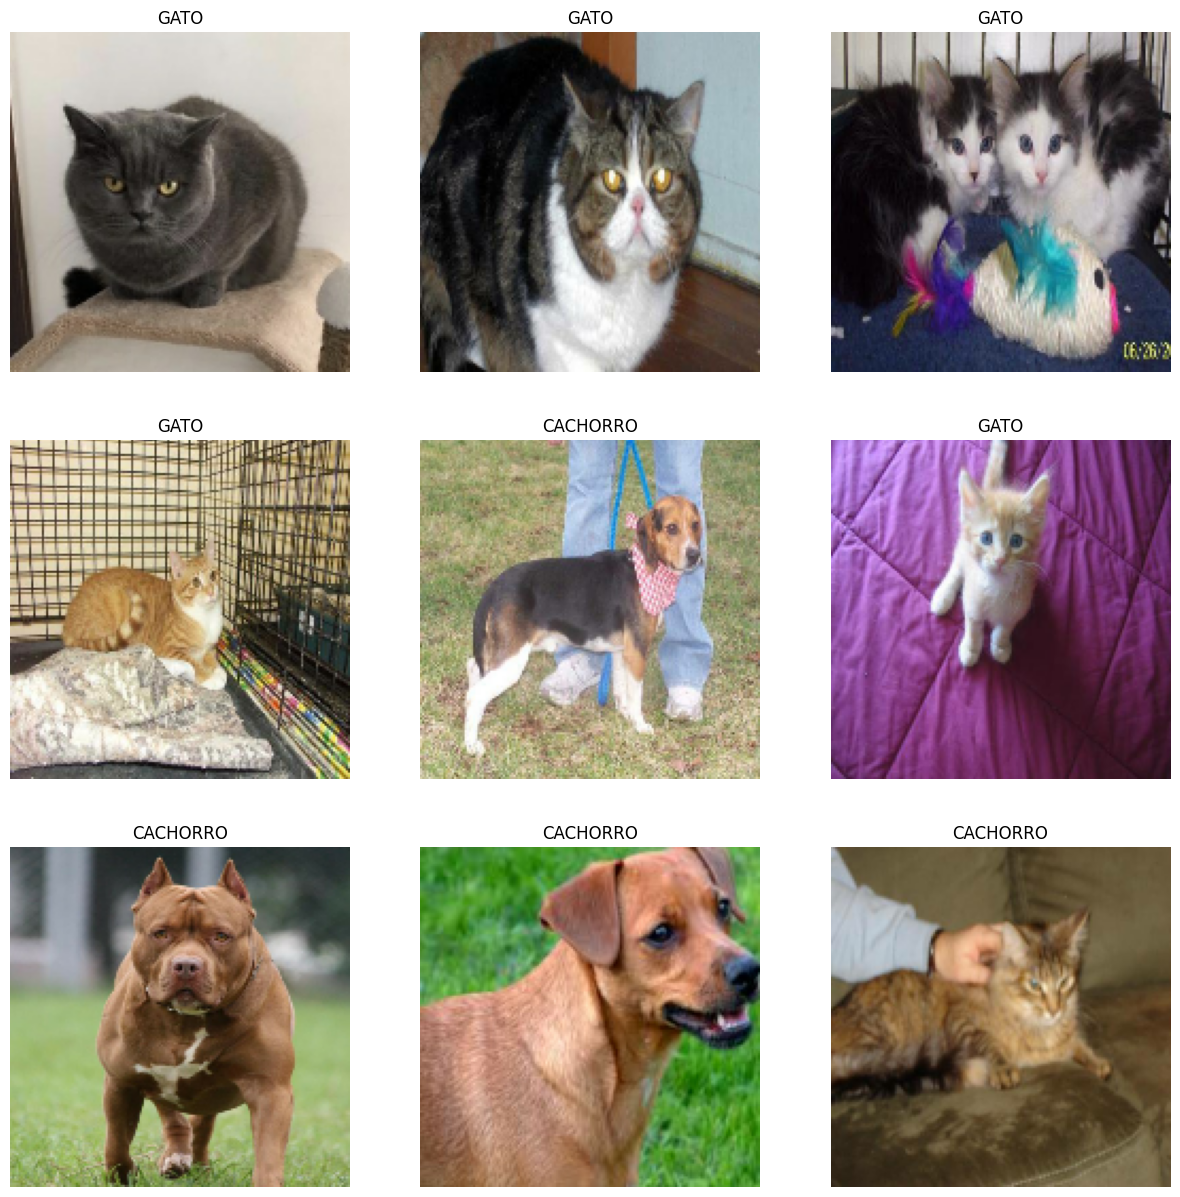

In [35]:
plot_dataset_predictions(veja)